# Assignment: cleaning Fraud detection data



## Instructions

Use the techniques in  0401 and 0402 to clean  data. 

Columns of data

**step**: Maps a unit of time in the real world. In this case 1 step is 1 hour of time

**type**: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER

**amount**: amount of the transaction in local currency

**nameOig**: customer who started the transaction

**oldbalanceOrg** :initial balance before the transaction

**newbalanceOrig**: customer's balance after the transaction.

**nameDest**: recipient ID of the transaction.

**oldbalanceDest**: initial recipient balance before the transaction.

**newbalanceDest**: recipient's balance after the transaction.

**isFraud**: identifies a fraudulent transaction (1) and non fraudulent (0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [12]:
#Reading in the dataset

df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [13]:
#Viewing the data

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [14]:
#Dropping the redundant features

df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

In [5]:
#Inspecting the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206154 entries, 0 to 206153
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            206154 non-null  int64  
 1   type            206154 non-null  object 
 2   amount          206154 non-null  float64
 3   oldbalanceOrg   206154 non-null  float64
 4   newbalanceOrig  206154 non-null  float64
 5   oldbalanceDest  206153 non-null  float64
 6   newbalanceDest  206153 non-null  float64
 7   isFraud         206153 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ MB


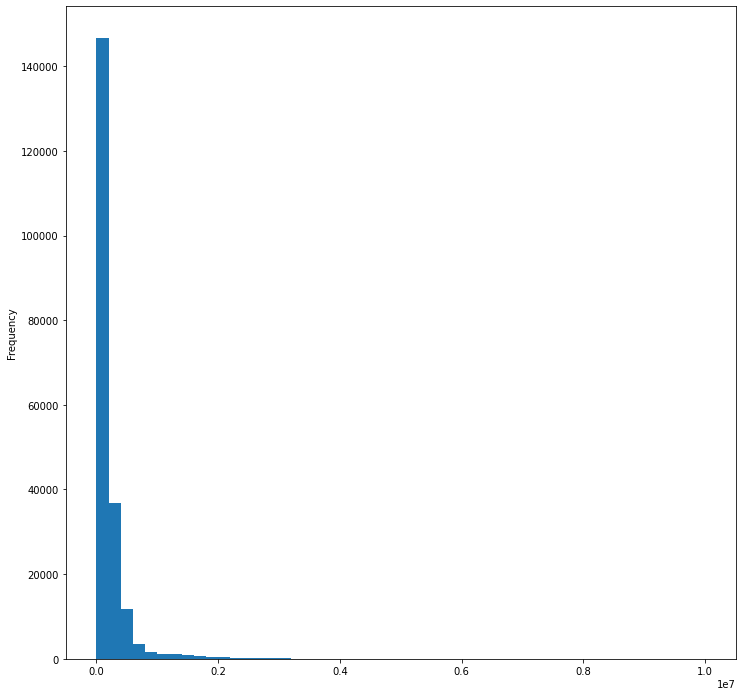

In [6]:
# Show a histogram of the amount data
df['amount'].plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

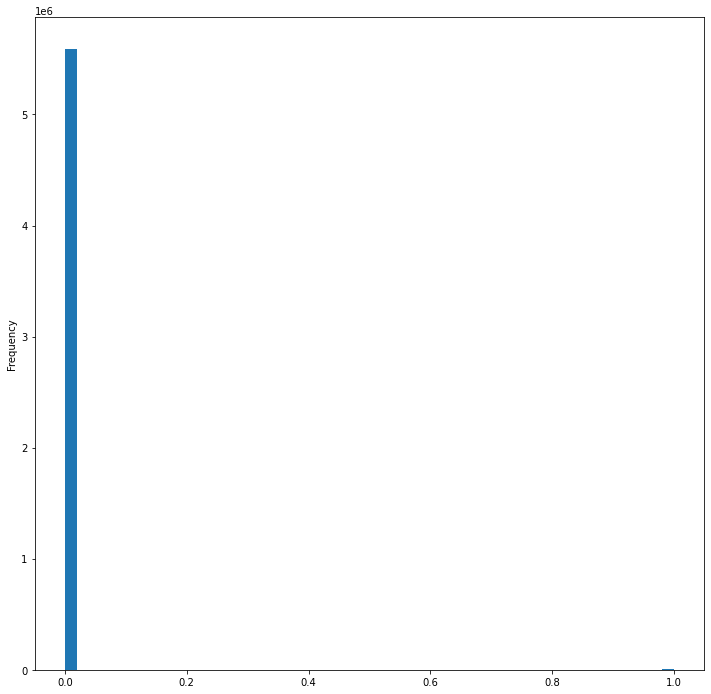

In [15]:
# Show a histogram of the isFraud data

df['isFraud'].plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

**Reducing the size of the data**

In [16]:
#Storing the fraudulent data into a dataframe

df_fraud = df[df['isFraud'] == 1]

In [17]:
#Storing the non-fraudulent data into a dataframe 

df_nofraud = df[df['isFraud'] == 0]

In [18]:
#Storing 12,000 rows of non-fraudulent data

df_nofraud = df_nofraud.head(12000)

In [19]:
#Joining both datasets together 

df = pd.concat([df_fraud, df_nofraud], axis = 0)

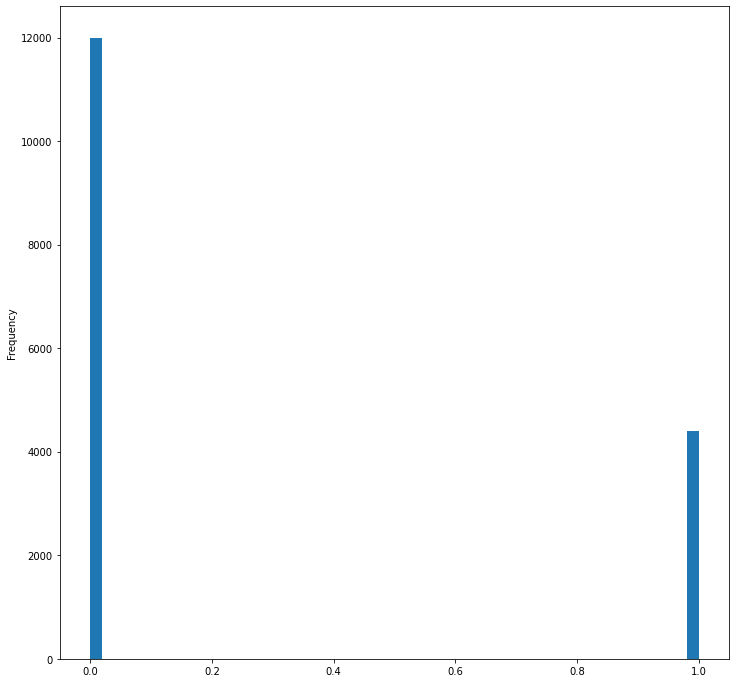

In [20]:
df['isFraud'].plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

**Encoding the categorical feature**

In [21]:
#Converting the type column to categorical

df['type'] = df['type'].astype('category')

In [22]:
#Integer Encoding the 'type' column

type_encode = LabelEncoder()

In [23]:
#Integer encoding the 'type' column

df['type'] = type_encode.fit_transform(df.type)

In [24]:
df['type']

2        4
3        1
251      4
252      1
680      4
        ..
12067    3
12068    3
12069    3
12070    3
12071    3
Name: type, Length: 16393, dtype: int64

In [26]:
#One hot encoding the 'type' column

type_one_hot = OneHotEncoder()
type_one_hot_encode = type_one_hot.fit_transform(df.type.values.reshape(-1,1)).toarray()

In [27]:
#Adding the one hot encoded variables to the dataset 

ohe_variable = pd.DataFrame(type_one_hot_encode, columns = ["type_"+str(int(i)) for i in range(type_one_hot_encode.shape[1])])
df = pd.concat([df, ohe_variable], axis=1)

In [31]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,1.0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
#Dropping the original type variable 

df = df.drop('type', axis = 1)

KeyError: ignored

**Checking for missing values**

In [33]:
#Checking every column for missing values

df.isnull().any()

step              True
amount            True
oldbalanceOrg     True
newbalanceOrig    True
oldbalanceDest    True
newbalanceDest    True
isFraud           True
type_0            True
type_1            True
type_2            True
type_3            True
type_4            True
dtype: bool

In [34]:
#Imputing the missing values with a 0

df = df.fillna(0)

In [36]:
#Checking if there are missing values left

df.isnull().any()

step              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
type_0            False
type_1            False
type_2            False
type_3            False
type_4            False
dtype: bool

In [37]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,1.0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Save the dataset**

In [38]:
df.to_csv('/content/fraud_prediction.csv')